### purpose

validate complex sim projections

In [1]:
from pythonimports import *
from myfigs import histo_box

import MVP_03_validate_gradient_forests as mvp03
import MVP_15_climate_outlier_validate_GF as mvp15
import MVP_summary_functions as mvp

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import rgb2hex

tutorial_dir = '/home/b.lind/offsets/run_20220919_tutorial'
validation_dir = makedir(op.join(tutorial_dir, 'gradient_forests/validation'))

mvp.latest_commit()
session_info.show()

#########################################################
Today:	August 09, 2023 - 13:39:10 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit dcaf4a98ad33a59e3d371eed0bb26b1885505dcf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Sat Jun 24 12:25:29 2023 -0400
#########################################################



# get popdata

In [2]:
inds = pd.read_table(f'{tutorial_dir}/tutorial/My_Individuals.txt')

inds.head()

,ind_index,x,y,phenotype1_mat,phenotype2_MTWetQ,phenotype3_MTDQ,phenotype4_PDM,phenotype5_PwarmQ,phenotype6_PWM,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM,subpopID,lon,lat
0,33,0.406184,0.233272,0.737967,-0.191421,0.142992,-0.131894,-0.452497,-0.541651,0.762432,-0.162238,0.261281,-0.332078,-0.471502,-0.477821,25,5.0,3.0
1,34,0.425697,0.837158,-0.274081,-0.428332,-0.012880,0.221058,0.229296,0.066597,-0.339330,-0.407667,-0.058296,0.288030,0.198810,0.017680,85,5.0,9.0
2,44,0.671673,0.581744,-0.676326,0.086629,-0.470671,0.218813,0.260098,-0.103465,-0.567733,0.090928,-0.414353,0.234899,0.230255,-0.053511,57,7.0,6.0
3,45,0.017466,0.329922,-0.283221,-0.403942,-0.333718,-0.200554,-0.345915,-0.410001,-0.245860,-0.200759,-0.267455,-0.265260,-0.389828,-0.458979,31,1.0,4.0
4,46,0.069744,0.121221,0.057616,-0.303201,0.731600,0.195679,-0.367110,0.196296,-0.121500,-0.306379,0.702858,0.211275,-0.352307,0.212751,11,1.0,2.0


In [3]:
locations = inds.groupby('subpopID')[['lon', 'lat']].apply(np.mean)

locations

,lon,lat
subpopID,,
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0
...,...,...
96,6.0,10.0
97,7.0,10.0
98,8.0,10.0


# get fitness

In [4]:
mvp15.fitness_dir = '/home/b.lind/offsets/run_20220919_tutorial/tutorial/fitness_mats'
fitness = mvp15.get_fitness(
    ['tutorial'],
)['tutorial']

fitness.index = fitness.index.astype(int)

fitness = fitness.loc[sorted(fitness.index)]

fitness


Reading fitness matrices ...


100%|███████████████| 1/1 [00:00<00:00,  2.78it/s]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.982222,0.924615,0.612,0.431,0.500000,0.660000,0.894444,0.878889,0.752667,0.731,0.862857,0.738889,0.49375,0.41500,0.568889,0.790833,0.809091,0.722,0.598182,0.608182,0.6625,0.598333,0.502857,0.422308,0.659167,0.781667,0.77250,0.618889,0.559231,0.532727,0.45625,0.472143,0.438,0.535556,0.705455,0.824286,0.690000,0.65875,0.483,0.526667,0.41750,0.461,0.496667,0.6425,0.732500,0.788571,0.709,0.616667,0.460,0.514286,0.42750,0.483,0.576364,0.723077,0.751818,0.75000,0.641429,0.524286,0.441538,0.483333,0.478462,0.522857,0.73250,0.742727,0.72000,0.666842,0.460,0.38375,0.45500,0.3875,0.48875,0.554000,0.616667,0.680000,0.669375,0.601818,0.410909,0.425714,0.432222,0.377778,0.498571,0.578,0.646,0.633846,0.669,0.529091,0.430,0.454444,0.419333,0.345,0.543333,0.620000,0.650000,0.656667,0.550000,0.483,0.474286,0.483077,0.388571,0.352308
2,0.965556,0.978462,0.748,0.576,0.641429,0.779167,0.906667,0.923333,0.863333,0.842,0.937143,0.868889,0.64625,0.55500,0.705556,0.859167,0.812727,0.780,0.715455,0.700000,0.8000,0.750000,0.648571,0.543077,0.779167,0.818333,0.75125,0.692222,0.667692,0.622727,0.59500,0.617143,0.569,0.678889,0.817273,0.834286,0.685833,0.74250,0.576,0.618889,0.55250,0.588,0.618889,0.7750,0.830000,0.815714,0.736,0.712000,0.542,0.592857,0.55125,0.601,0.679091,0.826154,0.840909,0.82000,0.714286,0.611429,0.520000,0.548889,0.606154,0.634286,0.78625,0.796364,0.79875,0.768947,0.547,0.46125,0.51625,0.4350,0.60625,0.653333,0.674667,0.730000,0.767500,0.710909,0.490909,0.491429,0.481111,0.420000,0.614286,0.662,0.685,0.703077,0.773,0.628182,0.511,0.511111,0.450667,0.377,0.655556,0.685789,0.696667,0.731111,0.640000,0.566,0.548571,0.520000,0.411429,0.379231
3,0.730000,0.825385,0.890,0.871,0.882857,0.874167,0.692222,0.695556,0.810667,0.789,0.827143,0.908889,0.92000,0.84000,0.912222,0.830833,0.642727,0.654,0.761818,0.700000,0.9200,0.952500,0.921429,0.803077,0.920000,0.691667,0.55250,0.637778,0.755385,0.656364,0.81250,0.874286,0.846,0.903333,0.891818,0.674286,0.520833,0.73250,0.642,0.685556,0.81000,0.830,0.840000,0.9175,0.860833,0.677143,0.593,0.706000,0.573,0.645714,0.80750,0.825,0.814545,0.874615,0.820000,0.74000,0.671429,0.618571,0.548462,0.598889,0.830000,0.820000,0.70250,0.705455,0.73000,0.746842,0.570,0.49375,0.55125,0.5100,0.78750,0.786000,0.655333,0.636667,0.743750,0.733636,0.541818,0.525714,0.518333,0.487778,0.800000,0.732,0.584,0.630000,0.770,0.662727,0.571,0.545556,0.476000,0.434,0.811111,0.646316,0.600000,0.686667,0.663333,0.620,0.612857,0.534615,0.444286,0.434615
4,0.496667,0.587692,0.800,0.964,0.927143,0.744167,0.468889,0.453333,0.616000,0.635,0.612857,0.747778,0.90750,0.97625,0.890000,0.650833,0.445455,0.459,0.630909,0.606364,0.7975,0.871667,0.928571,0.943077,0.814167,0.496667,0.37125,0.481111,0.697692,0.594545,0.81875,0.917143,0.976,0.896667,0.756364,0.465714,0.352500,0.58000,0.605,0.653333,0.93500,0.946,0.933333,0.8125,0.703333,0.482857,0.411,0.571333,0.527,0.621429,0.95125,0.931,0.850909,0.718462,0.640000,0.55625,0.520000,0.517143,0.506923,0.594444,0.923846,0.888571,0.54875,0.523636,0.54000,0.574211,0.502,0.46125,0.53500,0.5450,0.85750,0.816667,0.570667,0.462222,0.572500,0.605455,0.523636,0.502857,0.512222,0.513333,0.870000,0.712,0.424,0.460000,0.606,0.591818,0.562,0.536667,0.481333,0.465,0.854444,0.532632,0.428333,0.526667,0.601111,0.597,0.620000,0.517692,0.451429,0.465385
5,0.557778,0.651538,0.836,0.956,0.948571,0.830833,0.542222,0.531111,0.698667,0.732,0.680000,0.807778,0.94250,0.96250,0.916667,0.727500,0.533636,0.558,0.728182,0.710909,0.8750,0.918333,0.921429,0.910769,0.859167,0.595833,0.46000,0.590000,0.799231,0.703636,0.88875,0.947857,0.967,0.944444,0.830909,0.554286,0.444167,0.67625,0.713,0.757778,0.95500,0.954,0.947778,0.8800,0.781667,0.5

In [5]:
fitness.columns.dtype

dtype('int64')

In [6]:
fitness.index.dtype

dtype('int64')

# get offsets

In [7]:
offset_files = fs('/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/fitting/fitting_outfiles',
                  endswith='.txt')

assert len(offset_files) == 300, len(offset_files)
                 
offset_rows = defaultdict(list)
for f in offset_files:
    tutorial_str, pooled_str, marker_set, gardenID, *args = op.basename(f).split("_")
    
    df = pd.read_table(f).T
    df.index = [int(gardenID)]
    df.columns = df.columns.astype(int)
    
    offset_rows[marker_set].append(df)

In [8]:
offset_dfs = {}
for marker_set, dfs in offset_rows.items():
    df = pd.concat(dfs)
    df = df.loc[sorted(df.index)]
    
    offset_dfs[marker_set] = df
    
offset_dfs[marker_set]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.000000,1.140052e-02,0.031812,0.046653,3.977314e-02,0.032205,0.016758,0.020412,0.028378,0.031390,0.021140,0.025647,0.038017,0.046890,0.035593,0.027739,0.028848,0.031871,0.035743,0.036588,0.032872,0.033149,0.041103,0.048916,0.032338,0.028674,0.029988,0.035744,0.038625,0.042199,0.040613,0.037927,0.043623,0.035043,0.030725,0.027758,0.035257,0.033212,0.044449,0.040721,0.043274,0.042216,0.038125,0.032933,0.030003,0.029480,0.035349,0.034040,0.046558,0.042567,0.043041,0.041788,0.039794,0.030874,0.029459,0.031816,0.033912,0.042666,0.051262,0.044050,0.040861,0.041255,0.031999,0.030997,0.032605,0.034848,0.048011,0.052972,0.047514,0.048469,0.040001,0.039555,0.034649,0.034601,0.034985,0.036032,0.051067,0.049592,0.049120,0.054801,0.039683,0.036484,0.037464,0.038479,0.035732,0.039885,0.048696,0.047071,0.057002,0.057884,0.040153,0.035376,0.037118,0.035975,0.040531,0.045122,0.043087,0.052229,6.074389e-02,0.061815
2,0.011401,4.857226e-17,0.024791,0.039269,3.267478e-02,0.027641,0.014875,0.016481,0.022442,0.026453,0.014325,0.017795,0.030833,0.039663,0.029342,0.024330,0.028103,0.028490,0.030494,0.032144,0.026239,0.026606,0.034252,0.043491,0.027756,0.026745,0.031472,0.032246,0.033831,0.038316,0.033985,0.031252,0.038471,0.029137,0.026530,0.026995,0.034349,0.029158,0.040295,0.036926,0.037107,0.037224,0.032924,0.027790,0.025773,0.027893,0.033559,0.030161,0.042788,0.039302,0.037539,0.037770,0.036571,0.026442,0.025925,0.028600,0.030423,0.038826,0.047863,0.041288,0.035712,0.037641,0.029854,0.028291,0.028673,0.030504,0.043849,0.049319,0.045105,0.046625,0.035335,0.036283,0.033015,0.032354,0.030797,0.031054,0.047357,0.046721,0.047603,0.053489,0.035566,0.033189,0.036106,0.035579,0.031024,0.035194,0.045245,0.045182,0.056612,0.057252,0.036595,0.033052,0.035612,0.032741,0.036526,0.041514,0.040532,0.051866,6.074939e-02,0.061574
3,0.031812,2.479062e-02,0.000000,0.018161,1.188568e-02,0.018975,0.027690,0.030503,0.022382,0.025413,0.017457,0.012189,0.008042,0.020837,0.009992,0.019639,0.030561,0.030164,0.025043,0.029130,0.014167,0.008394,0.011418,0.028437,0.015656,0.026981,0.036046,0.030629,0.025443,0.032393,0.019782,0.012880,0.024473,0.014614,0.018388,0.028520,0.037911,0.026399,0.034112,0.030420,0.022002,0.024124,0.020696,0.018288,0.020467,0.029089,0.035884,0.027713,0.038228,0.034753,0.023946,0.027215,0.028705,0.020424,0.023184,0.028335,0.029297,0.035698,0.044414,0.037082,0.024431,0.028873,0.030043,0.028253,0.027356,0.028770,0.040279,0.046113,0.041855,0.040851,0.025647,0.029498,0.032595,0.034197,0.029496,0.027693,0.043579,0.043790,0.045179,0.047591,0.027173,0.028734,0.039552,0.037009,0.028939,0.031709,0.041206,0.043164,0.055932,0.053238,0.029077,0.033887,0.038755,0.033310,0.034467,0.036327,0.037008,0.052137,5.990419e-02,0.058832
4,0.046653,3.926894e-02,0.018161,0.000000,1.125568e-02,0.029912,0.042006,0.045525,0.035907,0.035881,0.033079,0.027434,0.015242,0.007693,0.015479,0.031811,0.044744,0.044188,0.036506,0.038362,0.026670,0.020939,0.009305,0.017055,0.023815,0.040702,0.050654,0.043594,0.033134,0.039197,0.025650,0.016591,0.017491,0.021422,0.028198,0.042088,0.052079,0.039159,0.040798,0.036348,0.018825,0.019037,0.020227,0.028140,0.032058,0.042575,0.049488,0.038446,0.044551,0.040512,0.019564,0.023610,0.027979,0.031026,0.035213,0.041088,0.040005,0.043954,0.050158,0.042010,0.023142,0.026588,0.040491,0.039997,0.039695,0.040293,0.047181,0.051877,0.046175,0.043525,0.025359,0.029861,0.040425,0.046324,0.041598,0.036917,0.049026,0.048721,0.048496,0.048827,0.027256,0.033242,0.050737,0.048634,0.040506,0.038732,0.046321,0.047120,0.058178,0.054061,0.028404,0.043164,0.049640,0.044009,0.041290,0.040898,0.041026,0.054616,6.184170e-02,0.059968
5,0.039773,3.267478e-02,0.011886,0.011256,1.734723e

In [9]:
offset_dfs[marker_set].index.dtype

dtype('int64')

In [10]:
offset_dfs[marker_set].columns.dtype

dtype('int64')

# validate

In [11]:
vmin = math.inf
vmax = -math.inf

validation = pd.DataFrame(
    columns=['seed', 'ind_or_pooled', 'marker_set', 'garden', 'score']
)

heatmaps = defaultdict(lambda: mvp03.blank_dataframe())
for marker_set, offset in offset_dfs.items():
    corrs = offset.corrwith(fitness, axis=1, method='kendall')
    
    for subpopID, corr in corrs.items():
        lon, lat = locations.loc[subpopID]
        heatmaps[marker_set].loc[lon, lat] = corr
        
        if corr < vmin:
            vmin = corr
        if corr > vmax:
            vmax = corr
            
        validation.loc[nrow(validation), : ] = ('tutorial',
                                                'pooled',
                                                marker_set,
                                                subpopID,
                                                corr)
        
validation['program'] = 'GF'

In [12]:
vmin, vmax

(-0.8662626262626264, -0.5559260637334817)

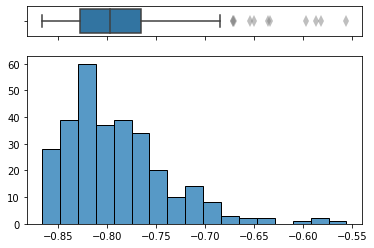

(<AxesSubplot:>, <AxesSubplot:>)

In [13]:
histo_box(validation.score)

# visualize

In [14]:
def show_heatmaps(vmin=None, vmax=None):
    axes = []
    for marker_set, heatmap in heatmaps.items():
        g = sns.heatmap(heatmaps[marker_set],
                        vmin=vmin,
                        vmax=vmax,
                        cmap='viridis',
                        cbar_kws={'label': "Kendall's $\\tau$"})

        g.set(title=marker_set)

        g.figure.axes[-1].yaxis.label.set_size(15)

        plt.show()

        axes.append(g.figure.axes[0])
    
    return axes

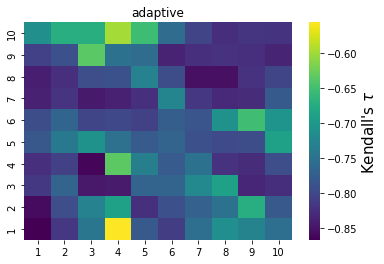

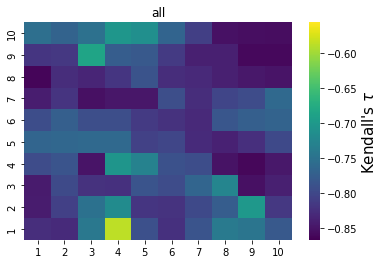

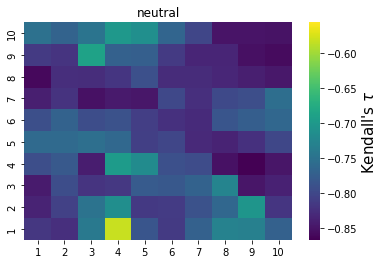

In [15]:
# heatmaps with common color bar
axes = show_heatmaps(vmin=vmin, vmax=vmax)

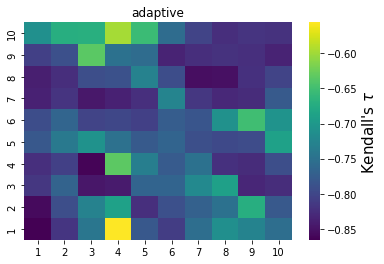

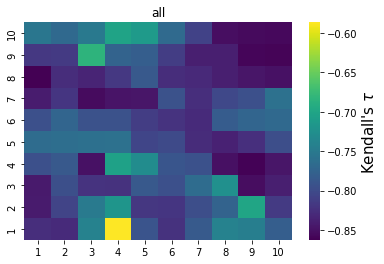

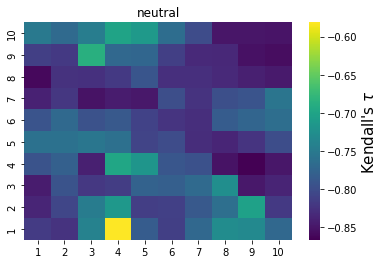

In [16]:
# heatmaps with unique color bar per heatmap
axes = show_heatmaps()

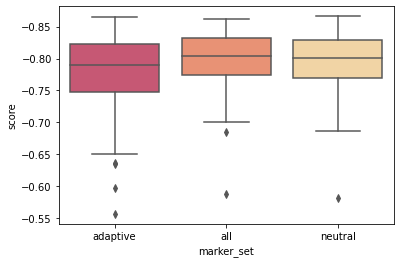

In [17]:
g = sns.boxplot(data=validation,
                x='marker_set',
                y='score',
                palette=mvp.boxplot_kwargs['palette']
               )

g.axes.invert_yaxis()

In [18]:
def make_scatter(m1, m2):
    fig, ax = plt.subplots()
    
    m1_df = validation[validation.marker_set == m1].copy().reset_index(drop=True)
    m2_df = validation[validation.marker_set == m2].copy().reset_index(drop=True)
    
    print(nrow(m1_df), nrow(m2_df))
    
    ax.scatter(m1_df['score'],
               m2_df['score'])

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    ax.set_xlabel(m1)
    ax.set_ylabel(m2)
    
    
    perc = (m1_df.score <= m2_df.score).sum() / nrow(m1_df)
    perc = '{:.0f}'.format(perc*100)
    ax.set_title(f'{perc}% of {m1} scores are ≤ {m2} scores')
    
    ax.invert_yaxis()
    ax.invert_xaxis()
    
    
    plt.show()
    
    pass

100 100


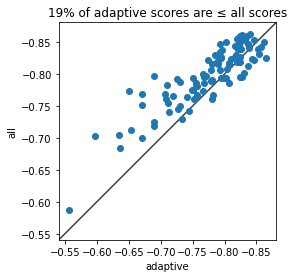

100 100


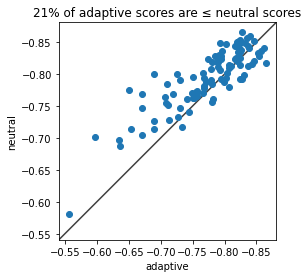

100 100


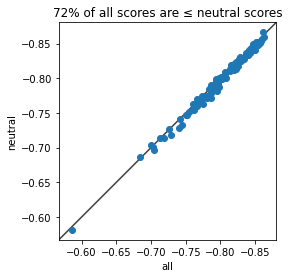

In [19]:
for i, marker_set1 in enumerate(['adaptive', 'all', 'neutral']):
    for j, marker_set2 in enumerate(['adaptive', 'all', 'neutral']):
        if i < j:
            make_scatter(marker_set1, marker_set2)

# save

In [20]:
f = op.join(validation_dir, 'tutorial_validation_scores.txt')

validation.to_csv(f, sep='\t', index=False, header=True)

f

'/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/validation/tutorial_validation_scores.txt'

# look at climate similarity

In [21]:
tutorial_dir

'/home/b.lind/offsets/run_20220919_tutorial'

In [22]:
ls(f'{tutorial_dir}/gradient_forests/training/training_files')

['tutorial_Rout_Gmat_sample_maf-gt-p01_GFready_pooled_adaptive.txt',
 'tutorial_Rout_Gmat_sample_maf-gt-p01_GFready_pooled_all.txt',
 'tutorial_Rout_Gmat_sample_maf-gt-p01_GFready_pooled_neutral.txt',
 'tutorial_envfile_GFready_pooled.txt',
 'tutorial_rangefile_GFready_pooled.txt']

In [23]:
envdata = pd.read_table(f'{tutorial_dir}/gradient_forests/training/training_files/tutorial_envfile_GFready_pooled.txt',
                        index_col=0)

envdata

,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM
1,0.186225,-0.226935,0.861531,0.221974,-0.363974,0.761569
2,0.070353,-0.265649,0.799727,0.169512,-0.417965,0.315295
3,0.264633,-0.248372,0.375248,-0.172690,-0.586408,-0.320803
4,0.371616,0.167485,0.063118,-0.465978,-0.656053,-0.625240
5,0.244613,0.117437,-0.010939,-0.291486,-0.528748,-0.537376
...,...,...,...,...,...,...
96,-0.288220,0.261489,-0.317123,-0.018548,0.228030,-0.045559
97,-0.116570,0.323553,-0.231351,-0.269762,0.344912,0.059459
98,0.093915,0.400397,-0.150975,-0.408936,0.588880,0.274592
99,0.034177,0.399089,-0.440848,-0.464035,0.673533,0.360201


In [24]:
envdata_pca = pd.DataFrame(StandardScaler().fit_transform(envdata),
                           index=envdata.index, columns=envdata.columns)
envdata_pca

,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM
1,0.803091,-0.711353,3.107031,0.672132,-1.143354,2.475522
2,0.363314,-0.839008,2.888028,0.508052,-1.310047,1.024306
3,1.100677,-0.782039,1.383896,-0.562200,-1.830097,-1.044194
4,1.506714,0.589174,0.277869,-1.479470,-2.045116,-2.034178
5,1.024694,0.424150,0.015450,-0.933738,-1.652076,-1.748456
...,...,...,...,...,...,...
96,-0.997598,0.899135,-1.069507,-0.080113,0.684389,-0.149140
97,-0.346125,1.103779,-0.765574,-0.865796,1.045251,0.192364
98,0.452739,1.357160,-0.480766,-1.301070,1.798474,0.891945
99,0.226015,1.352846,-1.507925,-1.473394,2.059831,1.170333


In [25]:
# show mean = 0 std = 1
for col in envdata_pca.columns:
    print(col, round(envdata_pca[col].mean(), 2), round(envdata_pca[col].std(), 2))

env1_mat 0.0 1.01
env2_MTWetQ 0.0 1.01
env3_MTDQ -0.0 1.01
env4_PDM 0.0 1.01
env5_PwarmQ -0.0 1.01
env6_PWM 0.0 1.01


In [26]:
# get PCA loadings
pca = PCA(n_components=3)
# pca.fit(envdata_pca)
# scores_pca = pca.transform(data)
loadings_array = pca.fit_transform(envdata_pca)
loadings = pd.DataFrame(loadings_array, index=envdata_pca.index)

In [27]:
loadings

,0,1,2
1,-1.434116,-3.048405,1.886297
2,-0.735544,-2.967670,0.711288
3,1.506561,-2.405912,-0.364228
4,3.375614,-1.226536,-0.492854
5,2.561511,-0.890333,-0.679086
...,...,...,...
96,-0.071275,1.738437,-0.448509
97,0.355452,1.810100,0.525420
98,0.349873,1.989762,1.899104
99,0.179640,2.904856,1.749328


In [28]:
# get rbg colors by converting loadings into values >= 0 and <= 1
colors = loadings.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
colors

,0,1,2
1,0.234202,0.000000,0.996537
2,0.336049,0.013232,0.678811
3,0.662935,0.105302,0.387989
4,0.935432,0.298597,0.353209
5,0.816740,0.353699,0.302851
...,...,...,...
96,0.432896,0.784543,0.365199
97,0.495110,0.796288,0.628552
98,0.494297,0.825734,1.000000
99,0.469478,0.975714,0.959500


In [29]:
for row, (r,g,b) in colors.iterrows():
    print(
        ColorText(str(row)).custom(
            rgb2hex((r, g, b))
        )
    )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


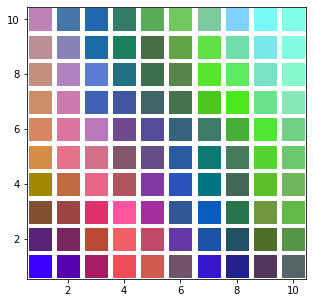

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
for row, *rgb in colors.iterrows():
    lon, lat = locations.loc[row]
    ax.scatter(lon, lat, c=rgb2hex(*rgb), s=500, marker='s')

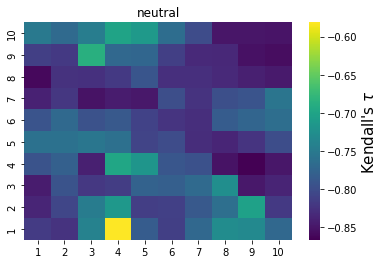

In [31]:
axes[2].get_figure()

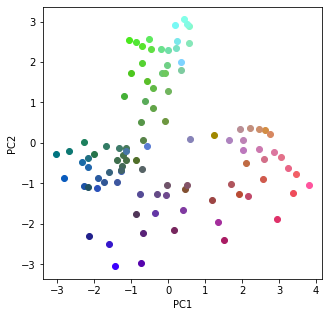

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
for pop, (x, y, z) in loadings.iterrows():
    rgb = colors.loc[pop]
    ax.scatter(x, y, c=rgb2hex(rgb))
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

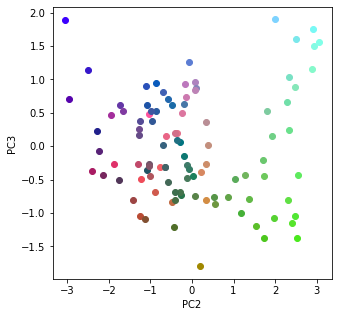

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
for pop, (x, y, z) in loadings.iterrows():
    rgb = colors.loc[pop]
    plt.scatter(y, z, c=rgb2hex(rgb))
    
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

plt.show()

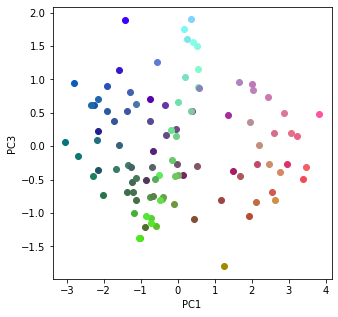

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
for pop, (x, y, z) in loadings.iterrows():
    rgb = colors.loc[pop]
    plt.scatter(x, z, c=rgb2hex(rgb))
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')

plt.show()